In [1]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
import seaborn as sns

import numpy as np
import pandas as pd 

import os 
import re
import nltk




In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset with labels using pandas
df = pd.read_csv('C:/Users/sidha/OneDrive/Desktop/Mp/Fake-News-Detection-/WebScrapping/political_fact_checker.csv')

# Split the dataset into training and testing sets, with 70% for training and 20% for testing
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Now, train_df contains the training data with labels,
# and test_df contains the testing data with labels


In [3]:
print(train_df.shape)

(3087, 8)


In [4]:
print(test_df.shape)

(1323, 8)


In [5]:
print(train_df.isnull().sum())
print("---------------------------")
print(test_df.isnull().sum())


Unnamed: 0         0
author             0
statement          0
source             0
date               0
target             0
BinaryTarget       0
BinaryNumTarget    0
dtype: int64
---------------------------
Unnamed: 0         0
author             0
statement          0
source             0
date               0
target             0
BinaryTarget       0
BinaryNumTarget    0
dtype: int64


In [6]:
train_df.head()

,Unnamed: 0,author,statement,source,date,target,BinaryTarget,BinaryNumTarget
500,500,Amy,Herschel Walker “is heavily funded by the oil ...,League of Conservation Voters,"December 1, 2022",half-true,REAL,1
3043,3043,Louis,“Gas prices highest in a decade. Worst jobs re...,Facebook posts,"May 26, 2021",barely-true,FAKE,0
2633,2633,Ciara,Video shows “pupils in Nigeria running away fr...,Facebook posts,"August 27, 2021",false,FAKE,0
549,549,Jeff,U.S. tax dollars sent to help Ukraine were lau...,Instagram posts,"November 15, 2022",false,FAKE,0
557,557,Ciara,A New York election results map is evidence of...,Viral image,"November 11, 2022",false,FAKE,0


In [7]:
test_df.head()

,Unnamed: 0,author,statement,source,date,target,BinaryTarget,BinaryNumTarget
1413,1413,Monique,"""In Iran, if a 12-year-old girl is raped and i...",Instagram posts,"May 19, 2022",false,FAKE,0
3352,3352,Paul,"""Illegal border crossings are up 173% from 1 y...",Richard Hudson,"March 25, 2021",half-true,REAL,1
3970,3970,Daniel,Siri gave “CONFIRMATION of the Democrats' sini...,Facebook posts,"November 10, 2020",pants-fire,FAKE,0
3629,3629,Ciara,"H&M advertised a sweatshirt that said, “Kooles...",Viral image,"February 2, 2021",false,FAKE,0
144,144,Amy,"Democrats ""want to ban gas powered cars and ga...",Nikki Haley,"March 13, 2023",half-true,REAL,1


In [8]:
test_df=test_df.fillna(' ')
train_df=train_df.fillna(' ')
test_df['total']=test_df['author']+' '+test_df['statement']+test_df['source']
train_df['total']=train_df['author']+' '+train_df['statement']+train_df['source']


Creating Wordcloud Visuals

In [9]:
real_words=''
fake_words=''
stopwords= set(STOPWORDS)

#iterate through csv file
for val in train_df[train_df['BinaryNumTarget']==1].total:
    #split the value 
    tokens = val.split()

    #converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()

    real_words+=" ".join(tokens)+" "

for val in train_df[train_df['BinaryNumTarget']==0].total:
    #split the value 
    tokens = val.split()

    #converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()

    fake_words+=" ".join(tokens)+" "

    

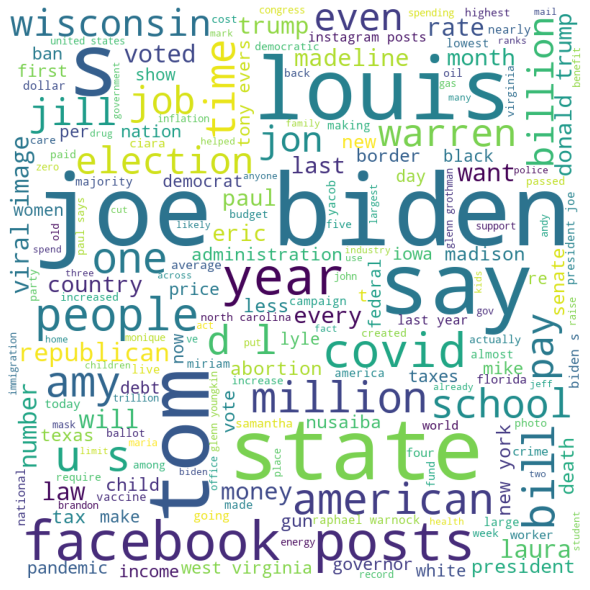

In [10]:
wordcloud = WordCloud(width= 800 , height = 800,
                      background_color='white', 
                      stopwords=stopwords,
                      min_font_size=10).generate(real_words)

#plot the WordCloud image
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

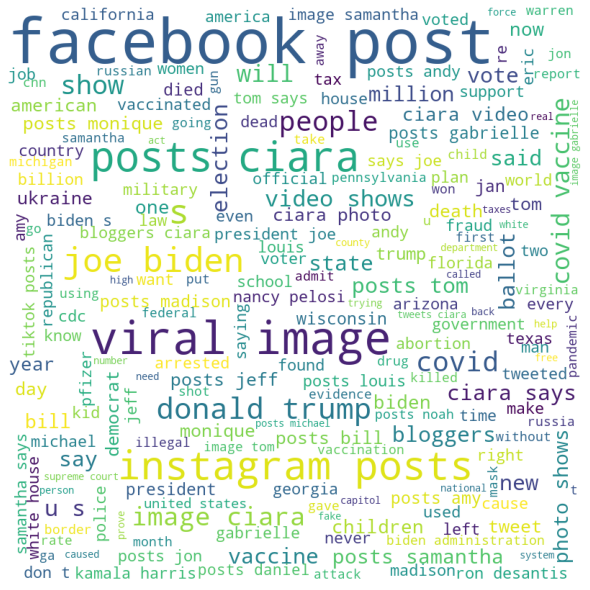

In [11]:
wordcloud = WordCloud(width= 800 , height = 800,
                      background_color='white', 
                      stopwords=stopwords,
                      min_font_size=10).generate(fake_words)

#plot the WordCloud image
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

Cleaning and preprocessing

1.Regex

In [12]:
#Remove punctuations from the String

s="!</> hello please$$ </>^s!!!u%%bs&&%$cri@@@be^^^&&!& </>*to@# the&&\ cha@@@n##%^^&nel!@# %%$"

In [13]:
s = re.sub(r'[^\w\s]','',s)

In [14]:
print(s)

 hello please subscribe to the channel 


2. Tokenization

In [15]:
#Downloading nltk data
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sidha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
# nltk.word_tokenize("Hello how are you")

def word_tokenize(sentence):
    # Define a list of punctuations
    punctuations = ['.', ',', ';', ':', '!', '?', '(', ')', '[', ']', '{', '}', '"', "'", '/', '\\', '-', '_', '+', '=', '@', '#', '$', '%', '&', '*', '^', '`', '~']

    # Replace all punctuations with a space
    for punctuation in punctuations:
        sentence = sentence.replace(punctuation, ' ')

    # Split the sentence by space to get words
    words = sentence.split()

    return words

# Input sentence
sentence = "Hello how are you"

# Call the word_tokenize function
words = word_tokenize(sentence)

# Print the tokenized words
print(words)


['Hello', 'how', 'are', 'you']


3.StopWords

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sidha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
sentence="Recession is a major risk to all the countries right now"

In [20]:
words = word_tokenize(sentence)
words = [w for w in words if w not in stop_words]
print(words)

['Recession', 'major', 'risk', 'countries', 'right']


4.Lemmatization

In [21]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

input_str="how could we ever just be friends"

In [22]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sidha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sidha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [24]:
#Tokenize the sentence
input_str=nltk.word_tokenize(input_str)

#Lemmatize each word
for word in input_str:
    print(lemmatizer.lemmatize(word))

how
could
we
ever
just
be
friend
